In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# font = 14
# plt.rcParams.update({'font.size': 14})

## bonito SSP

In [2]:
path = '/Users/yan/Desktop/eurecom_code/data/motif/error-rate/bonito-ssp/'
sam_path = path + '200707_SSP_formatted-mapped-mn.sam'
read_path = path + '200707_SSP_formatted.fasta'

In [3]:
read = []
read_id = ''
with open(read_path) as file_in:
    for line in file_in:
        if line.startswith('>'):
            read_id = line.strip()
        else:
            read.append([read_id, line.strip()])

read = pd.DataFrame(read)
read = read.rename(columns={0: "read_id", 1: "read_seq"})
read['read_id'] = read['read_id'].str[1:] 
read['read_id'] = read['read_id'].str.split(' ').str[0]
read['len'] = read['read_seq'].str.len()

print('nb of reads:' + str(len(read)))
print('longest of read length:' + str(read['len'].max()))
print('median read length:' + str(read['len'].median()))

read_draw_ssp = read[read['len']<200].copy()
print('select nb of reads within max len 200: ' + str(len(read_draw_ssp)))

nb of reads:102222
longest of read length:10960
median read length:25.0
select nb of reads within max len 200: 101077


199.0
4535.0


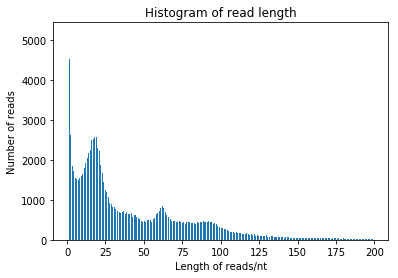

In [4]:
y, x, _ = plt.hist(read_draw_ssp['len'], bins=300)

print(x.max())
print(y.max())

ymin, ymax = y.min(), y.max()
plt.ylim(ymin, 1.2 * ymax)

plt.title('Histogram of read length')
plt.xlabel('Length of reads/nt')
plt.ylabel('Number of reads')
plt.savefig(path + '/his-len.pdf')

## bonito

In [5]:
path = '/Users/yan/Desktop/eurecom_code/data/motif/error-rate/bonito/'
sam_path = path + '200707_ori_bonito_formatted-mapped-mn.sam'
read_path = path + '200707_ori_bonito_formatted.fasta'

In [6]:
read = []
read_id = ''
with open(read_path) as file_in:
    for line in file_in:
        if line.startswith('>'):
            read_id = line.strip()
        else:
            read.append([read_id, line.strip()])

read = pd.DataFrame(read)
read = read.rename(columns={0: "read_id", 1: "read_seq"})
read['read_id'] = read['read_id'].str[1:] 
read['read_id'] = read['read_id'].str.split(' ').str[0]
read['len'] = read['read_seq'].str.len()

print('nb of reads:' + str(len(read)))
print('longest of read length:' + str(read['len'].max()))
print('median read length:' + str(read['len'].median()))

read_draw_bonito = read[read['len']<300].copy()
print('select nb of reads within max len 300: ' + str(len(read_draw_bonito)))

nb of reads:27198
longest of read length:3384
median read length:110.0
select nb of reads within max len 300: 26676


299.0
715.0


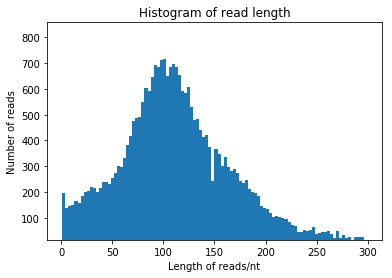

In [7]:
y, x, _ = plt.hist(read_draw_bonito['len'], bins=100)

print(x.max())
print(y.max())

ymin, ymax = y.min(), y.max()
plt.ylim(ymin, 1.2 * ymax)

plt.title('Histogram of read length')
plt.xlabel('Length of reads/nt')
plt.ylabel('Number of reads')
plt.savefig(path + '/his-len.pdf')

## guppy

In [8]:
path = '/Users/yan/Desktop/eurecom_code/data/motif/error-rate/guppy/'
sam_path = path + 'guppy-mapped-mn.sam'
read_path = path + '200707_ori_guppy.fasta'

In [9]:
read = []
read_id = ''
with open(read_path) as file_in:
    for line in file_in:
        if line.startswith('>'):
            read_id = line.strip()
        else:
            read.append([read_id, line.strip()])

read = pd.DataFrame(read)
read = read.rename(columns={0: "read_id", 1: "read_seq"})
read['read_id'] = read['read_id'].str[1:] 
read['read_id'] = read['read_id'].str.split(' ').str[0]
read['len'] = read['read_seq'].str.len()

print('nb of reads:' + str(len(read)))
print('longest of read length:' + str(read['len'].max()))  
print('median read length:' + str(read['len'].median()))

read_draw_guppy = read[read['len']<500].copy()
print('select nb of reads within max len 500: ' + str(len(read_draw_guppy)))

nb of reads:27198
longest of read length:11450
median read length:166.0
select nb of reads within max len 500: 26900


499.0
502.0


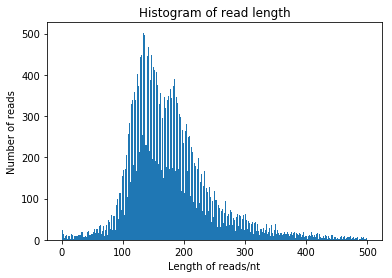

In [10]:
plt.clf()
y, x, _ = plt.hist(read_draw_guppy['len'], bins=300)

print(x.max())
print(y.max())

# ymin, ymax = y.min(), y.max()
# plt.ylim(ymin, 1.2 * ymax)

plt.title('Histogram of read length')
plt.xlabel('Length of reads/nt')
plt.ylabel('Number of reads')
plt.savefig(path + '/his-len.pdf')

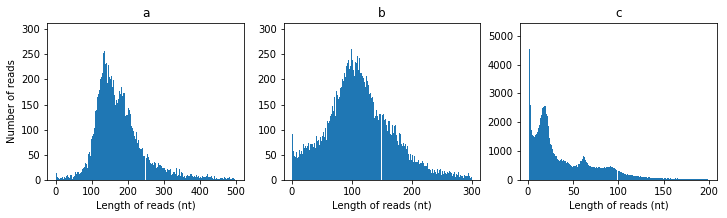

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# plot:
fig, axs = plt.subplots(1, 3)
fig.set_size_inches(12, 3)

y_guppy, x_guppy, _ = axs[0].hist(read_draw_guppy['len'], bins=500)
y_bonito, x_bonito, _ = axs[1].hist(read_draw_bonito['len'], bins=300)
y_ssp, x_ssp, _ = axs[2].hist(read_draw_ssp['len'], bins=200)

axs[0].set(ylim=(y_guppy.min(), y_guppy.max()*1.2))
axs[1].set(ylim=(y_bonito.min(), y_bonito.max()*1.2))
axs[2].set(ylim=(y_ssp.min(), y_ssp.max()*1.2))

axs[0].set_xlabel('Length of reads (nt)')
axs[1].set_xlabel('Length of reads (nt)')
axs[2].set_xlabel('Length of reads (nt)')

axs[0].set_ylabel('Number of reads')
axs[0].set_title('a')
axs[1].set_title('b')
axs[2].set_title('c')

plt.subplots_adjust(top=0.85)
plt.savefig('/Users/yan/Desktop/eurecom_code/data/motif/his-len.pdf',bbox_inches='tight')